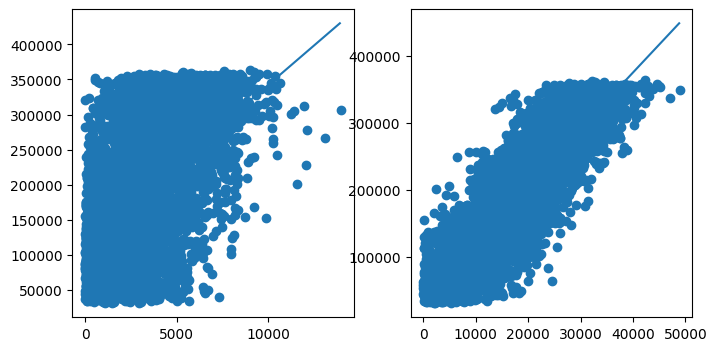

In [ ]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

sys.executable

sales_df = pd.read_csv("/home/linuxand/jupyter_notebooks/ML_procol/datasets/supervised_l/advertising_and_sales_clean.csv")

y = sales_df.iloc[:,-1].values
X_tv = sales_df.iloc[:, 0].values.reshape((-1,1))
X_radio = sales_df.iloc[:, 1].values.reshape((-1,1))
X_social_media = sales_df.iloc[:, 2].values.reshape((-1,1))
X_influencer = sales_df.iloc[:, 3].values.reshape((-1,1))

def stack_dependent_variables(a_py_list):
    list_to_return = np.concatenate(a_py_list, axis=1)
    return list_to_return

def model_creation(X, y, test_percentage):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_percentage)
    
    reg = LinearRegression()
    reg.fit(X_train, y_train)
        
    accuracy = reg.score(X_test, y_test)
    X_for_y_predicted = np.arange(X.min(), X.max(), step=100).reshape(-1, 1)
    y_predicted = reg.predict(X_for_y_predicted)
    
    return X_for_y_predicted, y_predicted, accuracy
    
     
if __name__ == "__main__":
      
    sources = [X_social_media, X_radio]
    fig, axs = plt.subplots(1, len(sources), figsize=(8, 4))
    counter = 0
    
    for ad_source in sources:
        X = stack_dependent_variables([ad_source])
        X_for_y_predicted, y_predicted, accuracy  = model_creation(X, y, 0.3)        

        
        axs[counter].scatter(ad_source.flatten(), y)
        axs[counter].plot(X_for_y_predicted.flatten(), y_predicted)
               
             
        counter += 1
    
    plt.show()